# Multiple Linear Regression Model
## Bike Sharing Assignment
#### Problem Statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic.In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. 
They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

-Which variables are significant in predicting the demand for shared bikes.<br>
-How well those variables describe the bike demands

## Step 1: Reading and Understanding the Data
Let us first import NumPy and Pandas and read the day dataset

In [1]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
bike_sharing=pd.read_csv("C:/Users/shaye/OneDrive/Desktop/Bike sharing assignment/day.csv")

In [4]:
# Check the head of the dataset
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspecting the various aspects of the housing dataframe


In [5]:
bike_sharing.shape

(730, 16)

#### Checking the descriptive information of the dataset.


In [6]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2:Cleaning and Visualising the Data
Let's now spend some time doing what is arguably the most important step

If there is some obvious multicollinearity going on, this is the first place to catch it
Here's where you'll also identify if some predictors directly have a strong association with the outcome variable
We'll visualise our data using matplotlib and seaborn.

In [8]:
bike_sharing

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


#### Let's check if we have got any missing values present in our data set

In [9]:
round(100*(bike_sharing.isnull().sum()/len(bike_sharing)),2).sort_values(ascending=False)

cnt           0.0
registered    0.0
casual        0.0
windspeed     0.0
hum           0.0
atemp         0.0
temp          0.0
weathersit    0.0
workingday    0.0
weekday       0.0
holiday       0.0
mnth          0.0
yr            0.0
season        0.0
dteday        0.0
instant       0.0
dtype: float64

#### This shows that we dont have any null values present in our data.

### Now let's check if we have any duplicates and if any , lets drop the entire duplicate row

In [10]:
bike_sharing_dup=bike_sharing.copy()
bike_sharing_dup.drop_duplicates(subset=None,inplace=True)

In [11]:
bike_sharing_dup.shape

(730, 16)

In [12]:
bike_sharing.shape

(730, 16)

#### The shape after running the drop duplicate command is same as the original data frame. Thus, we can say that there are no duplicate values present

###  Now lets drop those columns which aren't useful for analysis


#### 1.<b>instant<b> -  It contains only index value which wont be of much importance to us.<br>
#### 2.<b> dteday <b>-  In our data we have separate columns for year and month , so we can drop this column.<br>
#### 3.<b> casual <b> and <b> registered <b> -  These two columns add upto the count column
  

In [13]:
bike_sharing.drop(['instant','dteday','casual','registered'],axis=1, inplace=True)
bike_sharing

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


In [14]:
bike_sharing.shape

(730, 12)

In [15]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


#### let's visualize and check

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

[]

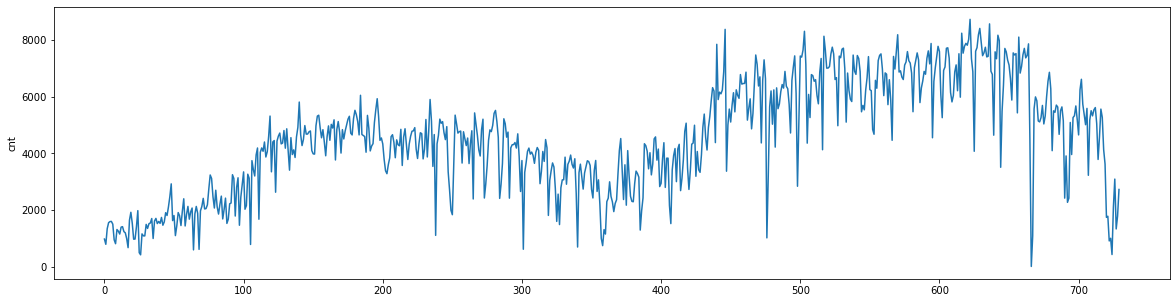

In [17]:
plt.figure(figsize=(20,5))
sns.lineplot(x=bike_sharing.index,y='cnt',data=bike_sharing).plot()

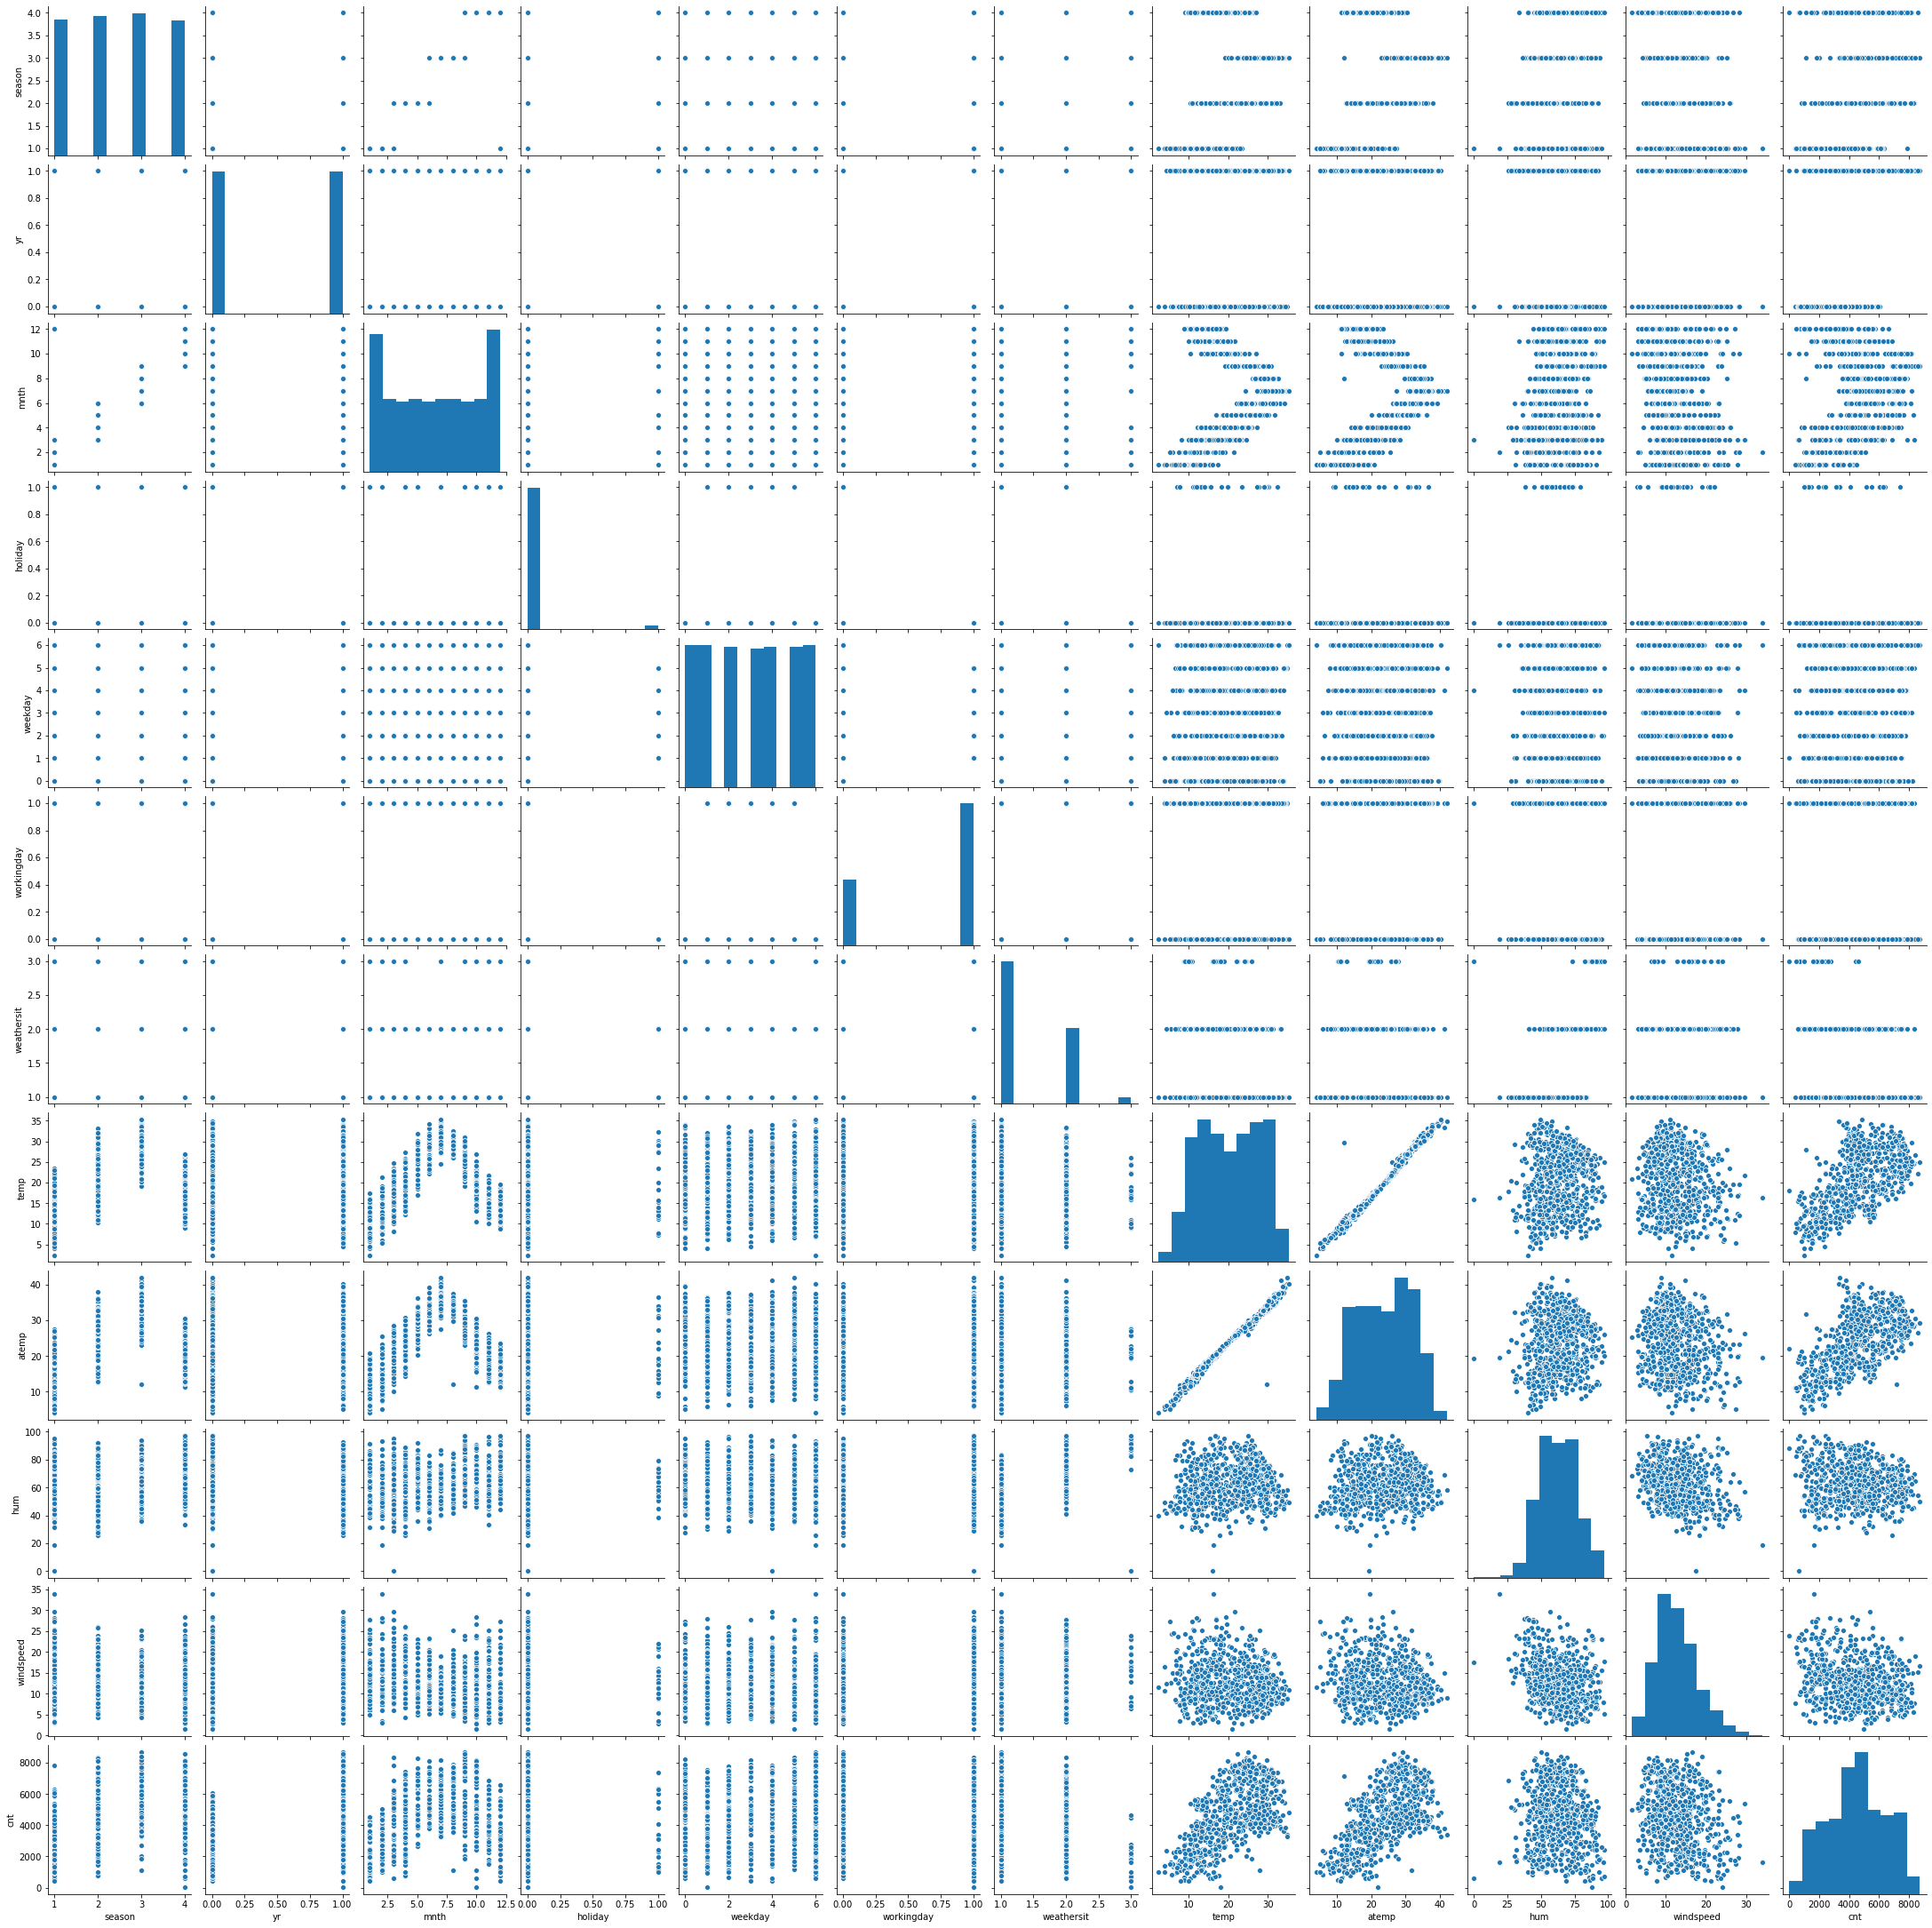

In [18]:
sns.pairplot(bike_sharing)
plt.show()

#### Let's check the correlation between month and season

In [19]:
bike_sharing['mnth'].corr(bike_sharing.season)

0.8310320517390565

#### Now we will convert specific numeric variables to categorical variables

In [20]:
category_1=['season']
def binary_map(x):
    return x.map({1: 'winter',2: 'spring',3: 'summer',4: 'fall'})
bike_sharing[category_1]=bike_sharing[category_1].apply(binary_map)

In [21]:
category_2=['weekday']
def binary_map(x):
    return x.map({6: 'Mon',0: 'Tue',1: 'Wed',2: 'Thu',3:'Fri',4:'Sat',5:'Sun'})
bike_sharing[category_2]=bike_sharing[category_2].apply(binary_map)

In [22]:
category_3=['weathersit']
def binary_map(x):
    return x.map({1: 'Clear',2: 'Mist',3: 'Light_Snow',4: 'Heavy_Rain'})
bike_sharing[category_3]=bike_sharing[category_3].apply(binary_map)

In [23]:
category_4=['mnth']
def binary_map(x):
    return x.map({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sep',10: 'oct',11: 'nov',12: 'dec'})
bike_sharing[category_4]=bike_sharing[category_4].apply(binary_map)

#### Here we will visusalize categorical variables

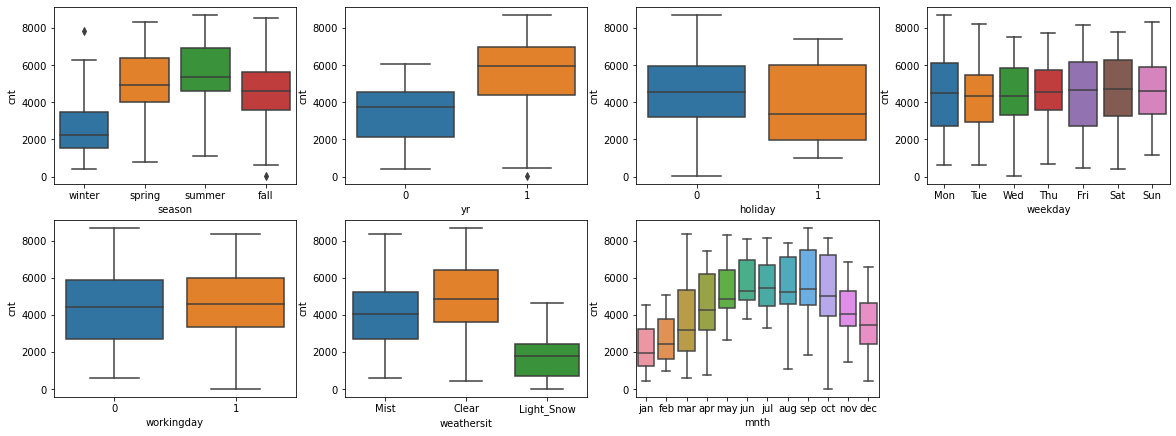

In [24]:
category=['season','yr','holiday','weekday','workingday','weathersit','mnth']
plt.figure(figsize=(20,15))
for i in enumerate(category):
    plt.subplot(4,4,i[0]+1)
    sns.boxplot(data=bike_sharing, x=i[1], y='cnt')
plt.show()

#### Observations that can be drawn
#### 1.summer,spring and fall are having higher sharing count
#### 2.Bike share is more between may to october
#### 3.During clear and mist conditions , there is more bike sharing count, when compared to light snow.

### We have visualized categorical variables, now we will move to visualizing numerical variables

In [25]:
numeric=['temp','hum','cnt','windspeed','atemp']

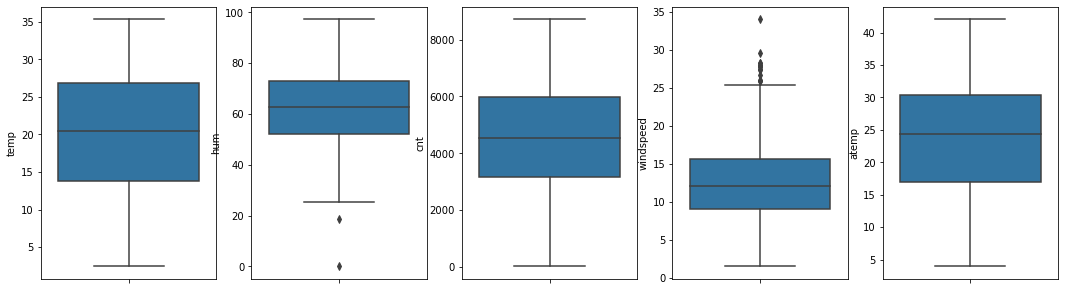

In [26]:
plt.figure(figsize=(22,5))

i = 1
for num in numeric:
    plt.subplot(1,6,i)
    sns.boxplot(y=num,data=bike_sharing)
    i+=1

[]

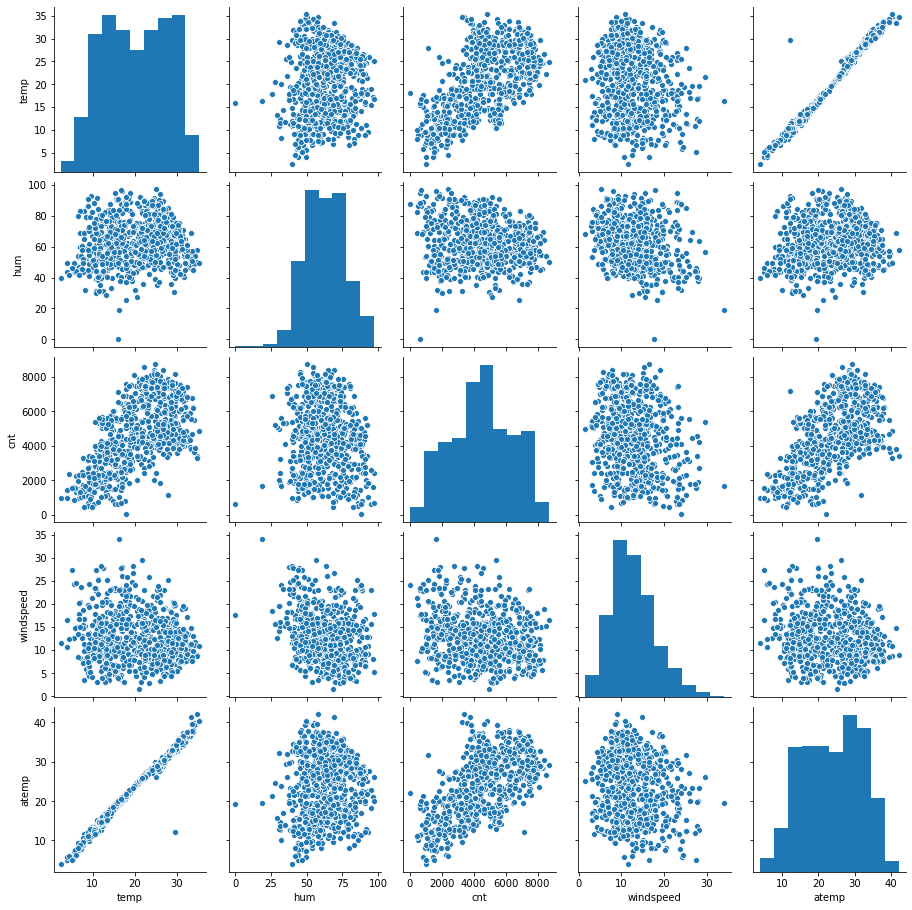

In [27]:
sns.pairplot(bike_sharing[numeric])
plt.plot()

In [28]:
bike_sharing['atemp'].corr(bike_sharing['cnt'])

0.6306853489531039

In [29]:
bike_sharing['temp'].corr(bike_sharing['cnt'])

0.6270440344135153

In [30]:

bike_sharing['hum'].corr(bike_sharing['cnt'])


-0.09854287912248035

In [31]:
bike_sharing['windspeed'].corr(bike_sharing['cnt'])

-0.23513249514103662

In [32]:
bike_sharing['cnt'].corr(bike_sharing['cnt'])

1.0

In [33]:
bike_sharing['atemp'].corr(bike_sharing['temp'])

0.991696178690565

In [34]:
bike_sharing['windspeed'].corr(bike_sharing['cnt'])

-0.23513249514103662

In [35]:
bike_sharing['yr'].corr(bike_sharing['cnt'])

0.5697284652110448

#### Observations

#### 1. atemp and temp are highly correlated
#### 2. temp/atemp can be a good predictor for our analysis

#### Now, Let's plot an heatmap and check once

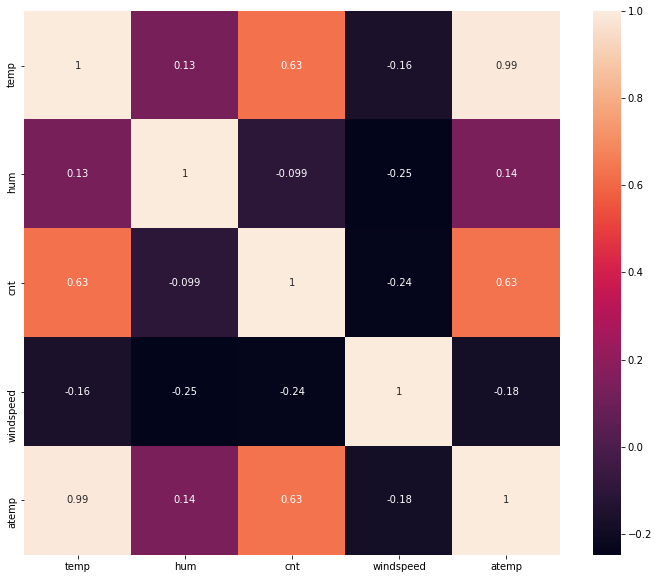

In [36]:
plt.figure(figsize=(12,10))
sns.heatmap(bike_sharing[numeric].corr(),annot=True)
plt.show()

#### We have cleaned and visualized the data, let's now move forward 

### Step 3: Data Preparation

In [37]:
bike_sharing

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,winter,0,jan,0,Mon,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,winter,0,jan,0,Tue,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,winter,0,jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,winter,0,jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,winter,0,jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,winter,1,dec,0,Sat,1,Mist,10.420847,11.33210,65.2917,23.458911,2114
726,winter,1,dec,0,Sun,1,Mist,10.386653,12.75230,59.0000,10.416557,3095
727,winter,1,dec,0,Mon,0,Mist,10.386653,12.12000,75.2917,8.333661,1341
728,winter,1,dec,0,Tue,0,Clear,10.489153,11.58500,48.3333,23.500518,1796


#### Let's start with creating dummy variables

In [38]:
dummy1=pd.get_dummies(bike_sharing['season'],drop_first=True)
dummy2=pd.get_dummies(bike_sharing['weekday'],drop_first=True)
dummy3=pd.get_dummies(bike_sharing['weathersit'])
dummy4=pd.get_dummies(bike_sharing['mnth'],drop_first=True)

In [39]:
bike_sharing

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,winter,0,jan,0,Mon,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,winter,0,jan,0,Tue,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,winter,0,jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,winter,0,jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,winter,0,jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,winter,1,dec,0,Sat,1,Mist,10.420847,11.33210,65.2917,23.458911,2114
726,winter,1,dec,0,Sun,1,Mist,10.386653,12.75230,59.0000,10.416557,3095
727,winter,1,dec,0,Mon,0,Mist,10.386653,12.12000,75.2917,8.333661,1341
728,winter,1,dec,0,Tue,0,Clear,10.489153,11.58500,48.3333,23.500518,1796


In [40]:
bike_sharing=pd.concat([bike_sharing,dummy1,dummy2,dummy3,dummy4],axis=1)

In [41]:
bike_sharing.drop(['mnth','weekday','weathersit','season'],axis=1,inplace=True)

In [42]:
bike_sharing

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,11.33210,65.2917,23.458911,2114,0,0,...,1,0,0,0,0,0,0,0,0,0
726,1,0,1,10.386653,12.75230,59.0000,10.416557,3095,0,0,...,1,0,0,0,0,0,0,0,0,0
727,1,0,0,10.386653,12.12000,75.2917,8.333661,1341,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,10.489153,11.58500,48.3333,23.500518,1796,0,0,...,1,0,0,0,0,0,0,0,0,0


In [43]:
bike_sharing.shape

(730, 31)

#### dummy variables are created , and now we have 31 columns

### Step 4: Creating Training and Test datasets

#### Lets import the required libraries

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
bike_sharing

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,11.33210,65.2917,23.458911,2114,0,0,...,1,0,0,0,0,0,0,0,0,0
726,1,0,1,10.386653,12.75230,59.0000,10.416557,3095,0,0,...,1,0,0,0,0,0,0,0,0,0
727,1,0,0,10.386653,12.12000,75.2917,8.333661,1341,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,10.489153,11.58500,48.3333,23.500518,1796,0,0,...,1,0,0,0,0,0,0,0,0,0


In [46]:
y=bike_sharing.pop('cnt')
X=bike_sharing

#### We will split the data in 70-30 format for training and testing

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=333)

In [48]:
X_train.shape

(511, 30)

In [49]:
X_test.shape

(219, 30)

In [50]:
y_train.shape

(511,)

In [51]:
y_test.shape

(219,)

#### We need more libraries to import for proceeding further

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [53]:
scaler=MinMaxScaler()

#### Here 'cnt ' is a dependent variable, so we will use 'atemp', 'temp', 'windspeed', 'hum' .

In [54]:
numeric=['atemp','hum','temp','windspeed']

In [55]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
483,1,0,0,18.791653,22.50605,58.7083,7.832836,1,0,0,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,16.126653,19.56980,49.4583,9.791514,0,0,0,...,0,0,0,0,0,0,0,0,1,0
212,0,0,1,31.638347,35.16460,55.0833,10.500039,0,1,0,...,0,0,0,0,0,0,0,0,0,0
714,1,0,0,14.862500,18.49690,83.8750,6.749714,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,0,0,0,5.671653,5.80875,43.4167,24.250650,0,0,1,...,0,0,1,0,0,0,0,0,0,0


#### At this moment we will apply scaling transformation

In [56]:
X_train[numeric]=scaler.fit_transform(X_train[numeric])

In [57]:
X_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
483,1,0,0,0.497426,0.487055,0.609956,0.194850,1,0,0,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0,0,0,...,0,0,0,0,0,0,0,0,1,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0,1,0,...,0,0,0,0,0,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,1,0,1,0.588804,0.569931,0.853247,0.138467,1,0,0,...,0,0,0,0,0,1,0,0,0,0
46,0,0,1,0.322889,0.311266,0.439977,0.472919,0,0,1,...,0,1,0,0,0,0,0,0,0,0
374,1,0,1,0.310971,0.314713,0.671711,0.340487,0,0,1,...,0,0,1,0,0,0,0,0,0,0
366,1,1,0,0.266546,0.227394,0.396160,0.633460,0,0,1,...,0,0,1,0,0,0,0,0,0,0


#### Variables are now scaled between 0 and 1

In [58]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.502935,0.023483,0.682975,0.540692,0.515474,0.647622,0.346509,0.246575,0.262231,0.250489,...,0.076321,0.084149,0.084149,0.078278,0.072407,0.078278,0.091977,0.086106,0.084149,0.082192
std,0.500481,0.151581,0.465773,0.227724,0.213446,0.149667,0.160166,0.431440,0.440279,0.433719,...,0.265771,0.277883,0.277883,0.268872,0.259415,0.268872,0.289276,0.280795,0.277883,0.274926
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343747,0.337054,0.536364,0.230786,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.538962,0.524322,0.646415,0.326911,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692171,0.758008,0.434605,0.000000,1.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Let's plot a heatmap and visualize

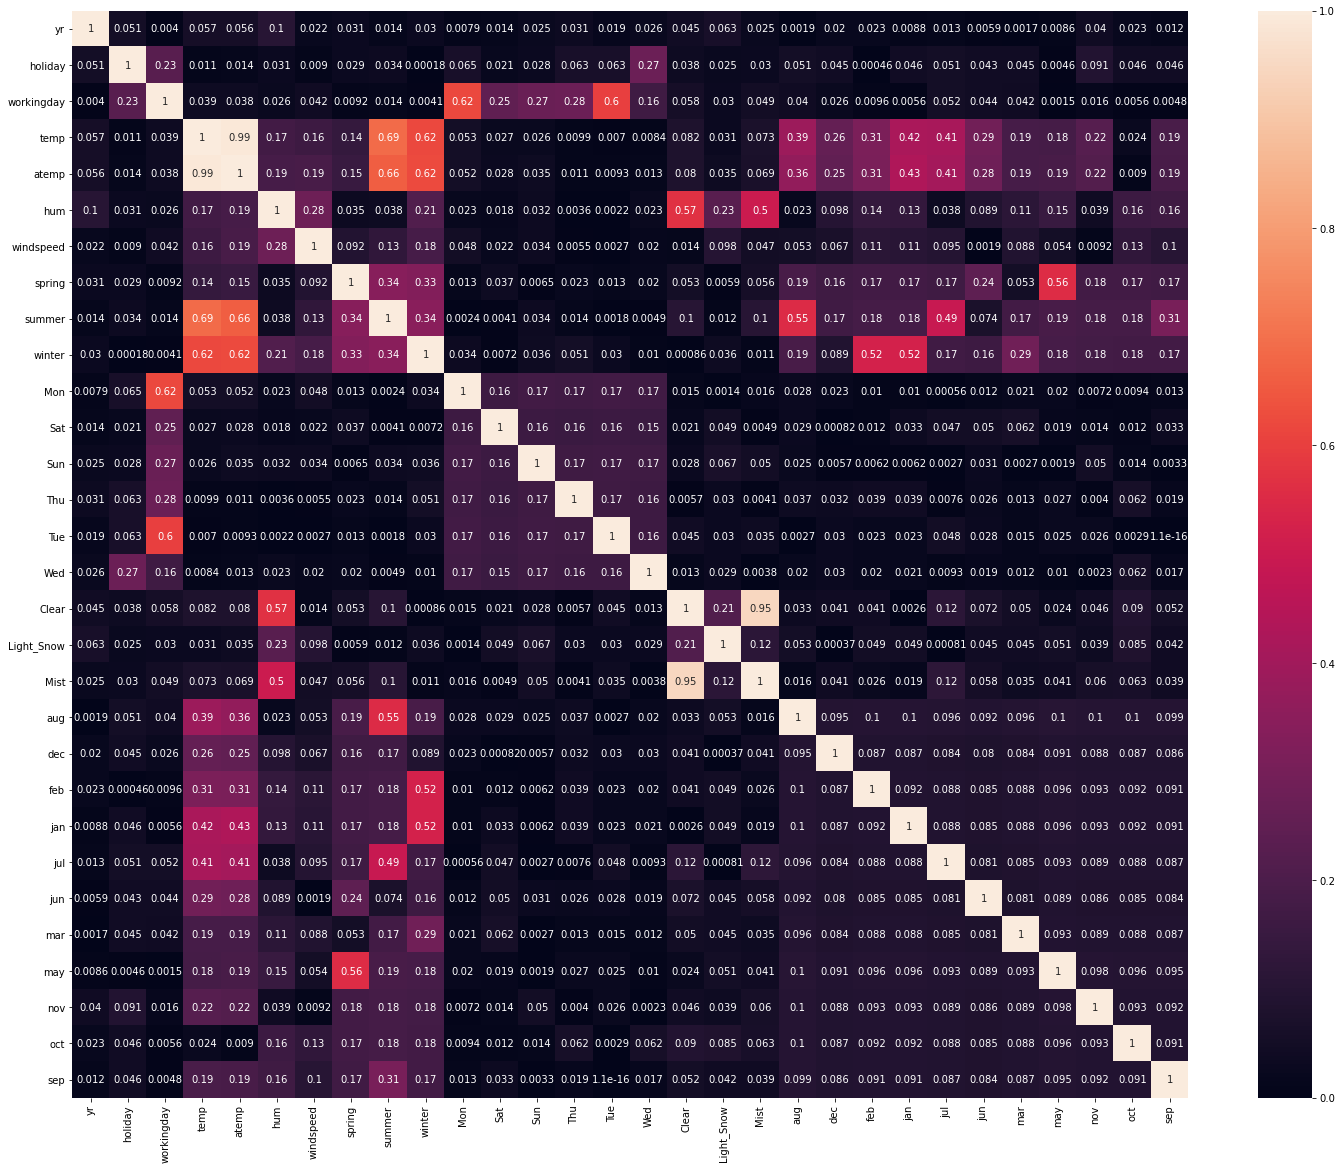

In [59]:
plt.figure(figsize=(25,20))
sns.heatmap(abs(X_train.corr()),annot=True)
plt.show()

#### There is multicolinearity between variables
####  temp and atemp has very high correlation value of 0.99.

### Step 5: Linear Model Building

#### Recursive Feature Elimination (RFE) - we will be using LinearRegression function from SciKit Learn for its compatibility with RFE

In [60]:
### Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [61]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

#### Running RFE with the output number of the variable equal to 15


In [62]:
rfe=RFE(lr,15)
rfe=rfe.fit(X_train,y_train)

In [63]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 12),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Mon', False, 3),
 ('Sat', False, 15),
 ('Sun', False, 16),
 ('Thu', False, 11),
 ('Tue', False, 9),
 ('Wed', False, 6),
 ('Clear', True, 1),
 ('Light_Snow', True, 1),
 ('Mist', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('jul', False, 5),
 ('jun', False, 14),
 ('mar', False, 7),
 ('may', False, 8),
 ('nov', True, 1),
 ('oct', False, 13),
 ('sep', True, 1)]

#### RFE supported Features

In [64]:
X_train.columns[rfe.support_]

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'spring', 'summer', 'winter',
       'Clear', 'Light_Snow', 'Mist', 'dec', 'jan', 'nov', 'sep'],
      dtype='object')

#### Features not supported by RFE

In [65]:
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed',
       'aug', 'feb', 'jul', 'jun', 'mar', 'may', 'oct'],
      dtype='object')

#### let's create X_test data frame with RFE selected Variables

In [66]:
X_train_rfe=['yr','temp','atemp','hum','windspeed','spring','summer','winter','Clear','Light_Snow','Mist','nov','sep','dec','jan']

In [67]:
X_train_rfe

['yr',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'spring',
 'summer',
 'winter',
 'Clear',
 'Light_Snow',
 'Mist',
 'nov',
 'sep',
 'dec',
 'jan']

#### Manual model development using statsmodel

#### Now we will create a dataframe that will contain the names of all the feature variables and their respective VIFs

### Model 1

In [68]:
import statsmodels.api as sm

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [70]:
X_train=X_train[X_train_rfe]

#### Add a constant

In [71]:
X_train_lm= sm.add_constant(X_train)

#### create a first fitted model

In [72]:
lr=sm.OLS(y_train,X_train_lm).fit()

In [73]:
lr.params

const         2284.829731
yr            1994.840515
temp          3431.699114
atemp          552.126766
hum          -1553.112384
windspeed    -1631.938041
spring        -541.920603
summer        -922.826454
winter       -1550.984792
Clear         1638.338324
Light_Snow    -601.534890
Mist          1248.026297
nov           -499.590647
sep            721.441842
dec           -420.723902
jan           -320.650437
dtype: float64

In [74]:
(print(lr.summary()))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     179.0
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          1.50e-183
Time:                        16:33:21   Log-Likelihood:                -4135.2
No. Observations:                 511   AIC:                             8300.
Df Residuals:                     496   BIC:                             8364.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2284.8297    245.129      9.321      0.0

####  Let's now create a dataframe that will contain the names of all the feature variables and their respective VIFs

In [75]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,58.22
2,atemp,53.44
8,Clear,41.67
10,Mist,28.69
6,summer,3.61
9,Light_Snow,3.51
7,winter,3.05
5,spring,2.49
3,hum,1.96
11,nov,1.78


#### We will now remove the one which has high p-value , in our case it is 'atemp'.

In [76]:
X=X_train
X=X.drop('atemp',1)

In [77]:
X

,yr,temp,hum,windspeed,spring,summer,winter,Clear,Light_Snow,Mist,nov,sep,dec,jan
483,1,0.497426,0.609956,0.194850,1,0,0,1,0,0,0,0,0,0
650,1,0.416433,0.513852,0.255118,0,0,0,1,0,0,0,0,0,0
212,0,0.887856,0.572294,0.276919,0,1,0,1,0,0,0,0,0,0
714,1,0.378013,0.871429,0.161523,0,0,0,0,0,1,0,0,1,0
8,0,0.098690,0.451083,0.700017,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,1,0.588804,0.853247,0.138467,1,0,0,0,0,1,0,0,0,0
46,0,0.322889,0.439977,0.472919,0,0,1,1,0,0,0,0,0,0
374,1,0.310971,0.671711,0.340487,0,0,1,1,0,0,0,0,0,1
366,1,0.266546,0.396160,0.633460,0,0,1,1,0,0,0,0,0,1


### Model 2

#### Add a constant

In [78]:
X_train_lm=sm.add_constant(X)

#### create a first fitted model

In [79]:
lr=sm.OLS(y_train,X_train_lm).fit()

In [80]:
lr.params

const         2292.257973
yr            1994.752388
temp          3952.210900
hum          -1547.775929
windspeed    -1653.162401
spring        -543.146430
summer        -933.872388
winter       -1552.226146
Clear         1642.374430
Light_Snow    -600.898907
Mist          1250.782450
nov           -499.892350
sep            721.455423
dec           -420.373731
jan           -324.434752
dtype: float64

In [81]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     193.0
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          1.17e-184
Time:                        16:33:21   Log-Likelihood:                -4135.3
No. Observations:                 511   AIC:                             8299.
Df Residuals:                     497   BIC:                             8358.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2292.2580    244.386      9.380      0.0

#### Let's calculate VIFs once again


In [82]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Clear,41.35
9,Mist,28.55
1,temp,4.16
5,summer,3.52
8,Light_Snow,3.51
6,winter,3.05
4,spring,2.48
2,hum,1.96
10,nov,1.78
13,jan,1.53


#### We will once again drop the highest P value , in this case that would be - 'jan'

In [83]:
X=X.drop('jan',1)

In [84]:
X

,yr,temp,hum,windspeed,spring,summer,winter,Clear,Light_Snow,Mist,nov,sep,dec
483,1,0.497426,0.609956,0.194850,1,0,0,1,0,0,0,0,0
650,1,0.416433,0.513852,0.255118,0,0,0,1,0,0,0,0,0
212,0,0.887856,0.572294,0.276919,0,1,0,1,0,0,0,0,0
714,1,0.378013,0.871429,0.161523,0,0,0,0,0,1,0,0,1
8,0,0.098690,0.451083,0.700017,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,1,0.588804,0.853247,0.138467,1,0,0,0,0,1,0,0,0
46,0,0.322889,0.439977,0.472919,0,0,1,1,0,0,0,0,0
374,1,0.310971,0.671711,0.340487,0,0,1,1,0,0,0,0,0
366,1,0.266546,0.396160,0.633460,0,0,1,1,0,0,0,0,0


### Model 3

#### Add a constant

In [85]:
X_train_lm=sm.add_constant(X)

#### create a first fitted model

In [86]:
lr=sm.OLS(y_train,X_train_lm).fit()

In [87]:
lr.params

const         2238.336988
yr            1988.521017
temp          4126.632742
hum          -1584.255311
windspeed    -1656.682422
spring        -536.972569
summer        -966.413536
winter       -1613.603301
Clear         1611.170388
Light_Snow    -598.424345
Mist          1225.590945
nov           -455.497863
sep            736.728540
dec           -343.255616
dtype: float64

In [88]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     207.4
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          6.36e-185
Time:                        16:33:21   Log-Likelihood:                -4137.5
No. Observations:                 511   AIC:                             8301.
Df Residuals:                     498   BIC:                             8356.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2238.3370    243.743      9.183      0.0

In [89]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Clear,40.48
9,Mist,28.14
1,temp,3.87
8,Light_Snow,3.49
5,summer,3.48
6,winter,2.92
4,spring,2.48
2,hum,1.95
10,nov,1.75
12,dec,1.31


#### Highest P value in this case is 'dec'.

In [90]:
X=X.drop('dec',1)

In [91]:
X

,yr,temp,hum,windspeed,spring,summer,winter,Clear,Light_Snow,Mist,nov,sep
483,1,0.497426,0.609956,0.194850,1,0,0,1,0,0,0,0
650,1,0.416433,0.513852,0.255118,0,0,0,1,0,0,0,0
212,0,0.887856,0.572294,0.276919,0,1,0,1,0,0,0,0
714,1,0.378013,0.871429,0.161523,0,0,0,0,0,1,0,0
8,0,0.098690,0.451083,0.700017,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
444,1,0.588804,0.853247,0.138467,1,0,0,0,0,1,0,0
46,0,0.322889,0.439977,0.472919,0,0,1,1,0,0,0,0
374,1,0.310971,0.671711,0.340487,0,0,1,1,0,0,0,0
366,1,0.266546,0.396160,0.633460,0,0,1,1,0,0,0,0


### Model 4

#### Add a constant

In [92]:
X_train_lm=sm.add_constant(X)

#### create a first fitted model

In [93]:
lr=sm.OLS(y_train,X_train_lm).fit()

In [94]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     224.0
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          4.90e-185
Time:                        16:33:21   Log-Likelihood:                -4140.0
No. Observations:                 511   AIC:                             8304.
Df Residuals:                     499   BIC:                             8355.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2156.5765    241.934      8.914      0.0

In [95]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Clear,38.88
9,Mist,27.51
1,temp,3.62
8,Light_Snow,3.46
5,summer,3.43
6,winter,2.66
4,spring,2.26
2,hum,1.91
10,nov,1.56
3,windspeed,1.20


#### In this case the highest p value is for 'nov' , let's drop that

In [96]:
X=X.drop('nov',1)

In [97]:
X

,yr,temp,hum,windspeed,spring,summer,winter,Clear,Light_Snow,Mist,sep
483,1,0.497426,0.609956,0.194850,1,0,0,1,0,0,0
650,1,0.416433,0.513852,0.255118,0,0,0,1,0,0,0
212,0,0.887856,0.572294,0.276919,0,1,0,1,0,0,0
714,1,0.378013,0.871429,0.161523,0,0,0,0,0,1,0
8,0,0.098690,0.451083,0.700017,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
444,1,0.588804,0.853247,0.138467,1,0,0,0,0,1,0
46,0,0.322889,0.439977,0.472919,0,0,1,1,0,0,0
374,1,0.310971,0.671711,0.340487,0,0,1,1,0,0,0
366,1,0.266546,0.396160,0.633460,0,0,1,1,0,0,0


### Model 5

#### Add a constant

In [98]:
X_train_lm=sm.add_constant(X)

#### create a first fitted model

In [99]:
lr=sm.OLS(y_train,X_train_lm).fit()

In [100]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.4
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          2.57e-185
Time:                        16:33:21   Log-Likelihood:                -4142.2
No. Observations:                 511   AIC:                             8306.
Df Residuals:                     500   BIC:                             8353.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2019.4733    233.481      8.649      0.0

In [101]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Clear,34.87
9,Mist,25.58
1,temp,3.45
8,Light_Snow,3.30
5,summer,3.26
2,hum,1.91
6,winter,1.91
4,spring,1.88
3,windspeed,1.20
10,sep,1.16


#### for 'Clear', we have highest VIF value, so we will drop that

In [102]:
X=X.drop('Clear',1)

In [103]:
X

,yr,temp,hum,windspeed,spring,summer,winter,Light_Snow,Mist,sep
483,1,0.497426,0.609956,0.194850,1,0,0,0,0,0
650,1,0.416433,0.513852,0.255118,0,0,0,0,0,0
212,0,0.887856,0.572294,0.276919,0,1,0,0,0,0
714,1,0.378013,0.871429,0.161523,0,0,0,0,1,0
8,0,0.098690,0.451083,0.700017,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
444,1,0.588804,0.853247,0.138467,1,0,0,0,1,0
46,0,0.322889,0.439977,0.472919,0,0,1,0,0,0
374,1,0.310971,0.671711,0.340487,0,0,1,0,0,0
366,1,0.266546,0.396160,0.633460,0,0,1,0,0,0


### Model 6

#### Add a constant

In [104]:
X_train_lm=sm.add_constant(X)

#### create a first fitted model

In [105]:
lr=sm.OLS(y_train,X_train_lm).fit()

In [106]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.4
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          2.57e-185
Time:                        16:33:21   Log-Likelihood:                -4142.2
No. Observations:                 511   AIC:                             8306.
Df Residuals:                     500   BIC:                             8353.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3536.2269    266.380     13.275      0.0

#### Let's check VIF values now

In [107]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,20.40
2,hum,16.48
3,windspeed,5.01
5,summer,4.39
4,spring,2.50
6,winter,2.16
8,Mist,2.13
0,yr,2.00
9,sep,1.26
7,Light_Snow,1.18


#### 'temp'- has the highest VIF value, so we will drop it

In [108]:
X=X.drop('temp',1)

In [109]:
X

,yr,hum,windspeed,spring,summer,winter,Light_Snow,Mist,sep
483,1,0.609956,0.194850,1,0,0,0,0,0
650,1,0.513852,0.255118,0,0,0,0,0,0
212,0,0.572294,0.276919,0,1,0,0,0,0
714,1,0.871429,0.161523,0,0,0,0,1,0
8,0,0.451083,0.700017,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
444,1,0.853247,0.138467,1,0,0,0,1,0
46,0,0.439977,0.472919,0,0,1,0,0,0
374,1,0.671711,0.340487,0,0,1,0,0,0
366,1,0.396160,0.633460,0,0,1,0,0,0


### Model 7

#### Add a constant

In [110]:
X_train_lm=sm.add_constant(X)

#### create a first fitted model

In [111]:
lr=sm.OLS(y_train,X_train_lm).fit()

In [112]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     169.2
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          1.10e-145
Time:                        16:33:22   Log-Likelihood:                -4238.5
No. Observations:                 511   AIC:                             8497.
Df Residuals:                     501   BIC:                             8539.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4881.4213    302.881     16.117      0.0

#### Let's check VIF value now

In [113]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,7.45
2,windspeed,4.84
4,summer,2.07
3,spring,2.04
5,winter,2.03
7,Mist,1.96
0,yr,1.94
8,sep,1.26
6,Light_Snow,1.12


#### As 'hum'- has high P value and VIF value, we will drop it.

In [114]:
X=X.drop('hum',1)

In [115]:
X

,yr,windspeed,spring,summer,winter,Light_Snow,Mist,sep
483,1,0.194850,1,0,0,0,0,0
650,1,0.255118,0,0,0,0,0,0
212,0,0.276919,0,1,0,0,0,0
714,1,0.161523,0,0,0,0,1,0
8,0,0.700017,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
444,1,0.138467,1,0,0,0,1,0
46,0,0.472919,0,0,1,0,0,0
374,1,0.340487,0,0,1,0,0,0
366,1,0.633460,0,0,1,0,0,0


### Model 8

#### Add a constant

In [116]:
X_train_lm=sm.add_constant(X)

#### create a first fitted model

In [117]:
lr=sm.OLS(y_train,X_train_lm).fit()

In [118]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     189.5
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          2.62e-146
Time:                        16:33:22   Log-Likelihood:                -4239.8
No. Observations:                 511   AIC:                             8498.
Df Residuals:                     502   BIC:                             8536.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4457.6792    137.690     32.375      0.0

In [119]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,3.84
4,winter,1.91
0,yr,1.81
2,spring,1.81
3,summer,1.73
6,Mist,1.44
7,sep,1.23
5,Light_Snow,1.06


In [120]:
X.columns

Index(['yr', 'windspeed', 'spring', 'summer', 'winter', 'Light_Snow', 'Mist',
       'sep'],
      dtype='object')

In [121]:
def build_model_sk(X,y):
    lr=LinearRegression()
    lr.fit(X,y)
    return lr

In [122]:
selected=['yr','windspeed','spring','summer','winter','Light_Snow','Mist','sep']

In [123]:
lr= build_model_sk(X_train[selected],y_train)
model=lr.intercept_,lr.coef_

In [124]:
model=pd.DataFrame(model[1])

In [125]:
a=pd.DataFrame(selected)

In [126]:
out=pd.concat([a,model],axis=1)

In [127]:
out.columns=['parameter','coefficient']

In [128]:
out.sort_values(by='coefficient')

,parameter,coefficient
5,Light_Snow,-2807.414024
4,winter,-1931.071942
1,windspeed,-1631.401704
6,Mist,-669.536195
2,spring,335.625121
7,sep,669.376835
3,summer,735.875222
0,yr,2105.529952


#### Now let's move to residual analysis of data

### Step 7: Residual Analysis of the train data

In [129]:
X_train[selected].head()

,yr,windspeed,spring,summer,winter,Light_Snow,Mist,sep
483,1,0.194850,1,0,0,0,0,0
650,1,0.255118,0,0,0,0,0,0
212,0,0.276919,0,1,0,0,0,0
714,1,0.161523,0,0,0,0,1,0
8,0,0.700017,0,0,1,0,0,0


In [130]:
y_train_pred=lr.predict(X_train[selected])

#### Let's plot the histogram of errors and check

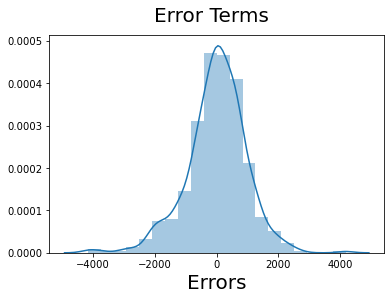

In [131]:
fig= plt.figure()
sns.distplot((y_train-y_train_pred),bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=20)
plt.show()

#### Here graph error is about 0 mean and it doesn't have long head or tail.

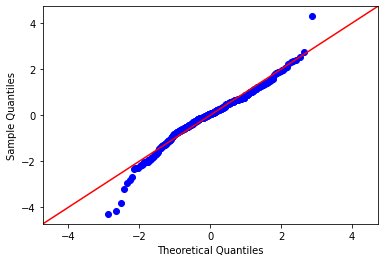

In [132]:
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

#### Based on the histogram, we can conclude that error terms are following a normal distribution

#### Let's check with a regression plot

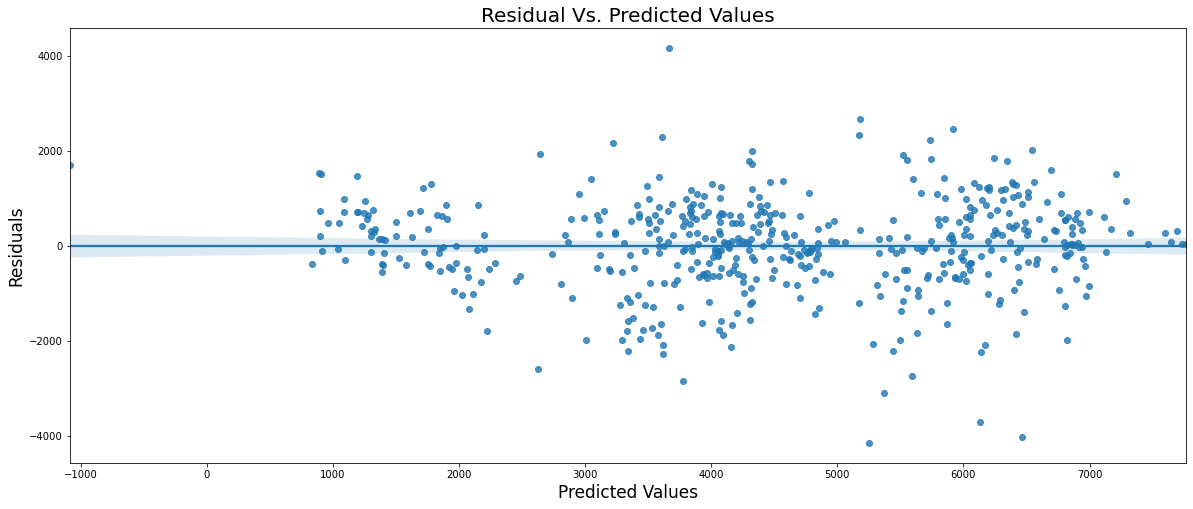

In [133]:
plt.figure(figsize=(20,8))
sns.regplot(x=y_train_pred, y=(y_train-y_train_pred))
plt.title('Residual Vs. Predicted Values', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 17})
plt.ylabel('Residuals', fontdict={'fontsize': 17})
plt.show()

#### The errors are uniformly distributed and there are no patterns.

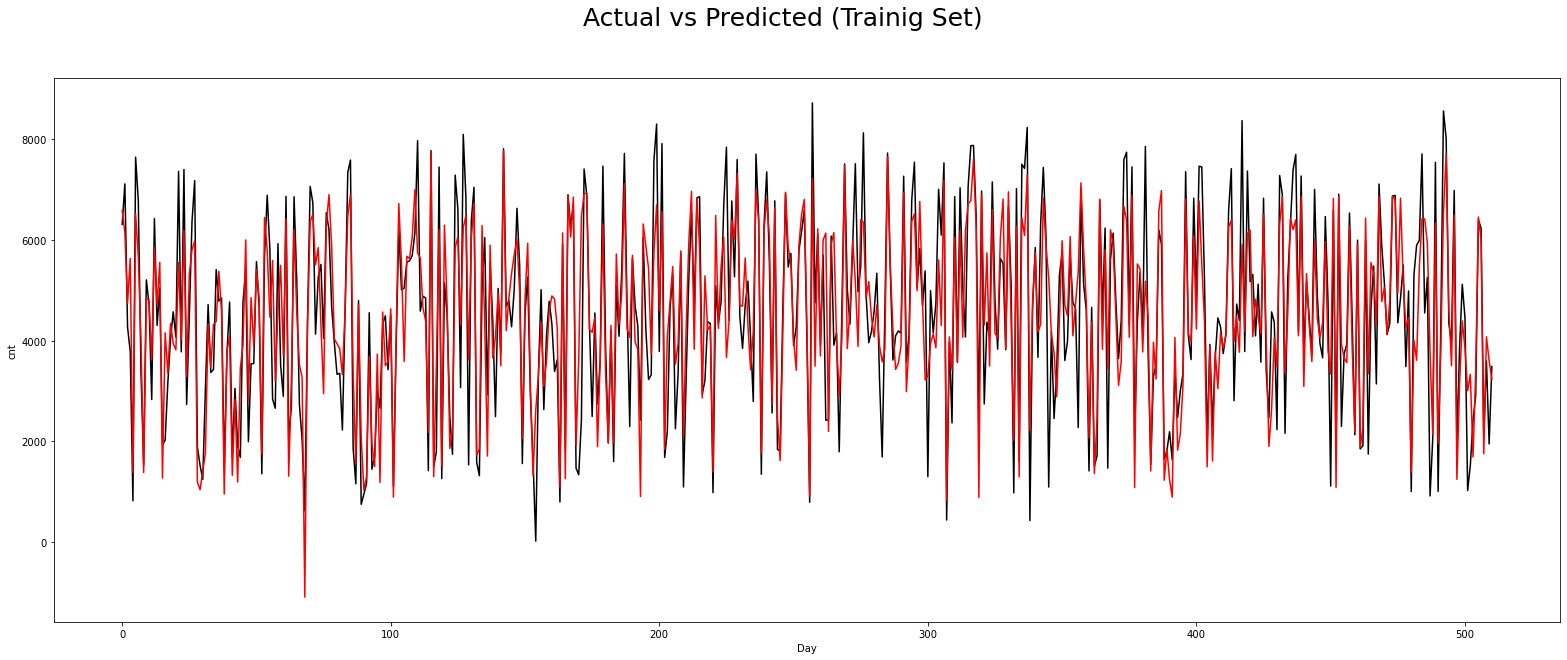

In [134]:
plt.figure(figsize=(27,10))
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="black")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted (Trainig Set)', fontsize = 25)
plt.xlabel('Day')
plt.ylabel('cnt')
plt.show()

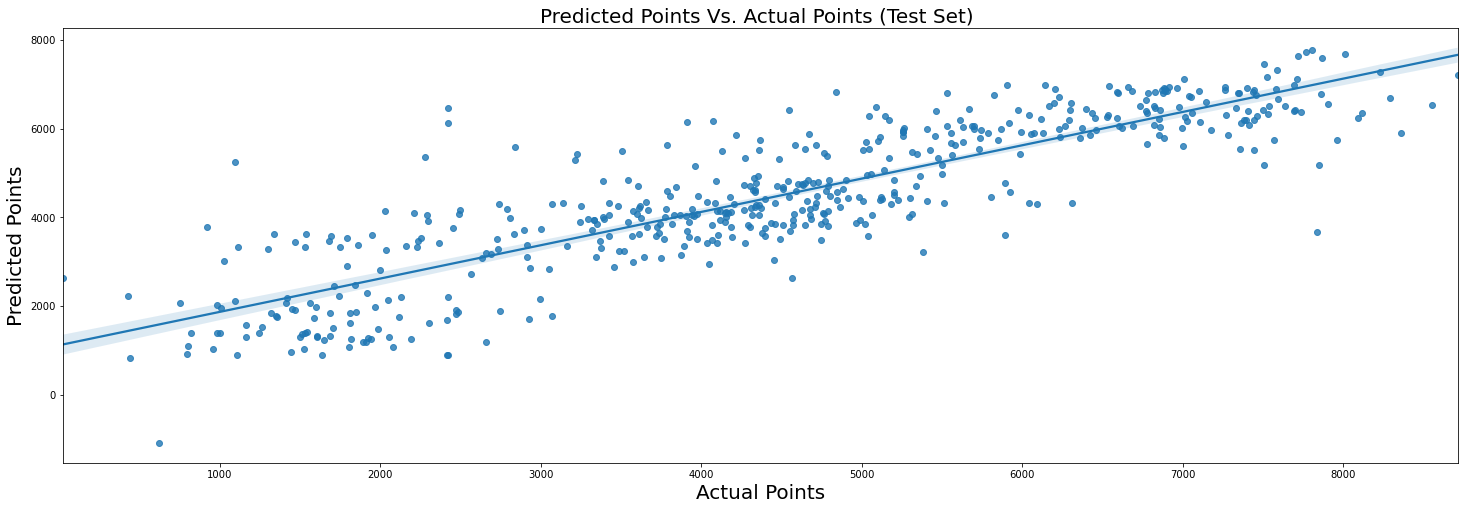

In [135]:
plt.figure(figsize=(25,8))
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points (Test Set) ' , fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 20})
plt.ylabel('Predicted Points', fontdict={'fontsize': 20})
plt.show()

#### Here the model follows actual value

### Step 8 : Making predictions using final model

#### Let's apply scaling on test sets

In [136]:
X_test[numeric]=scaler.transform(X_test[numeric])

In [137]:
y_test_pred=pd.Series(lr.predict(X_test[selected]))

In [138]:
r2_score(y_test,y_test_pred)

0.7546018834059549

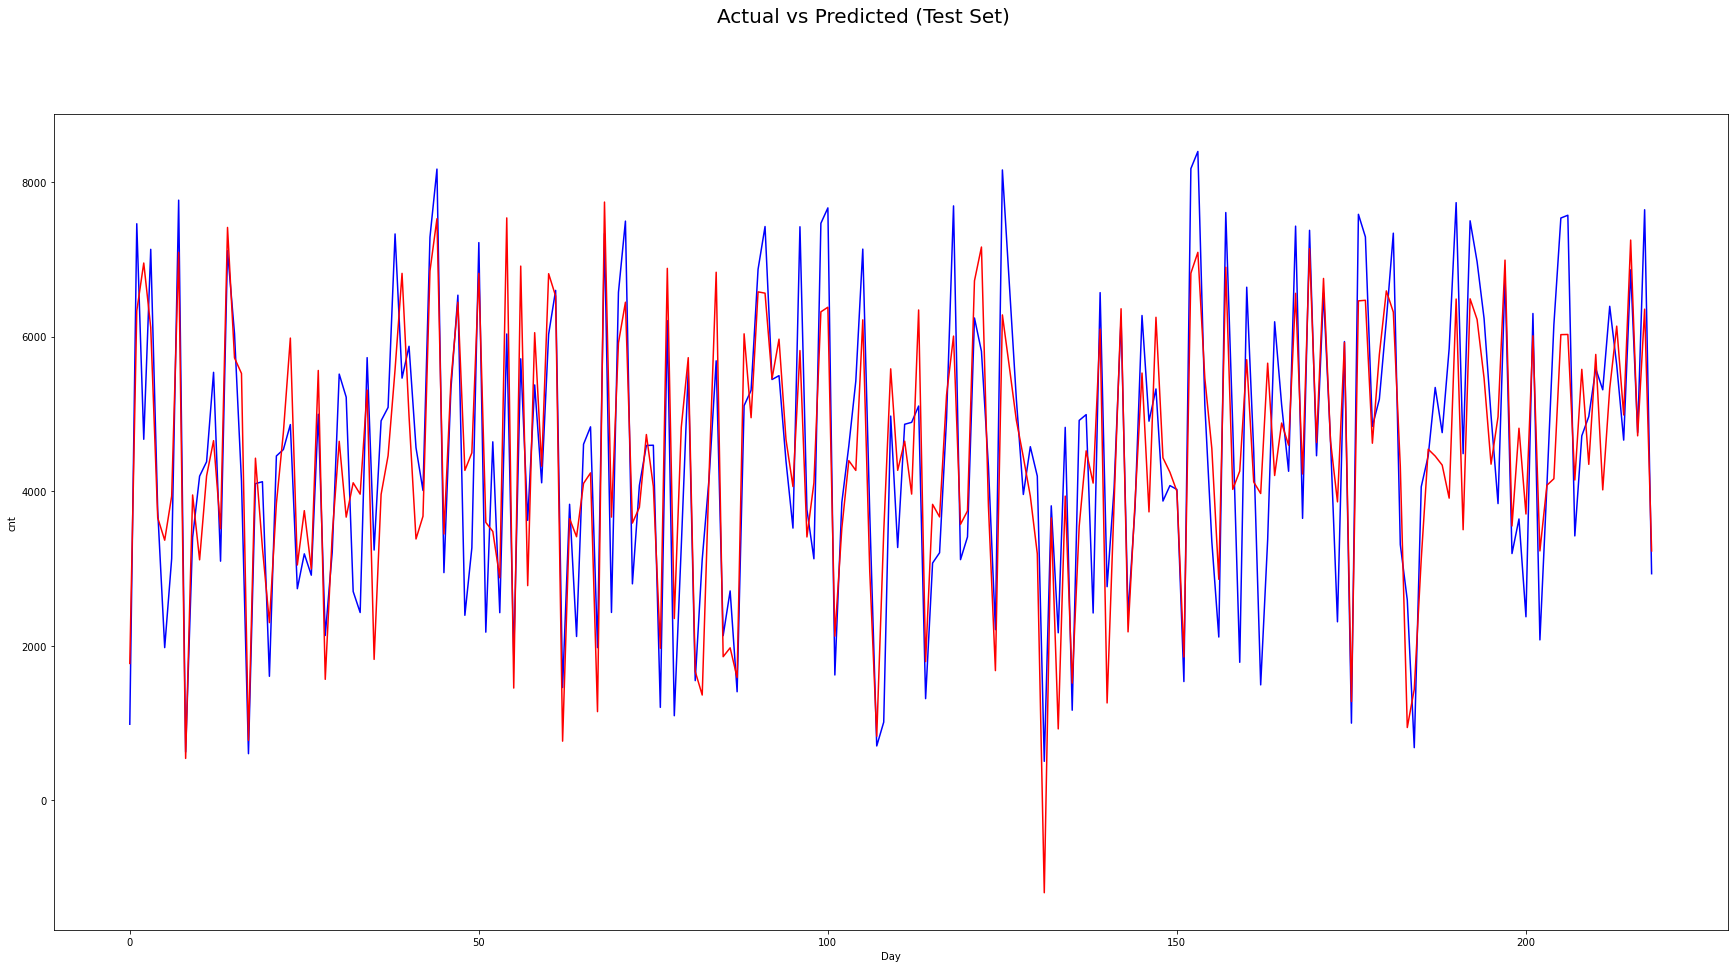

In [139]:
plt.figure(figsize=(30,15))
c = [i for i in range(0,len(y_test),1)]
plt.plot(c,y_test, color="blue")
plt.plot(c,y_test_pred, color="red")
plt.suptitle('Actual vs Predicted (Test Set)', fontsize = 20)
plt.xlabel('Day')
plt.ylabel('cnt')
plt.show()

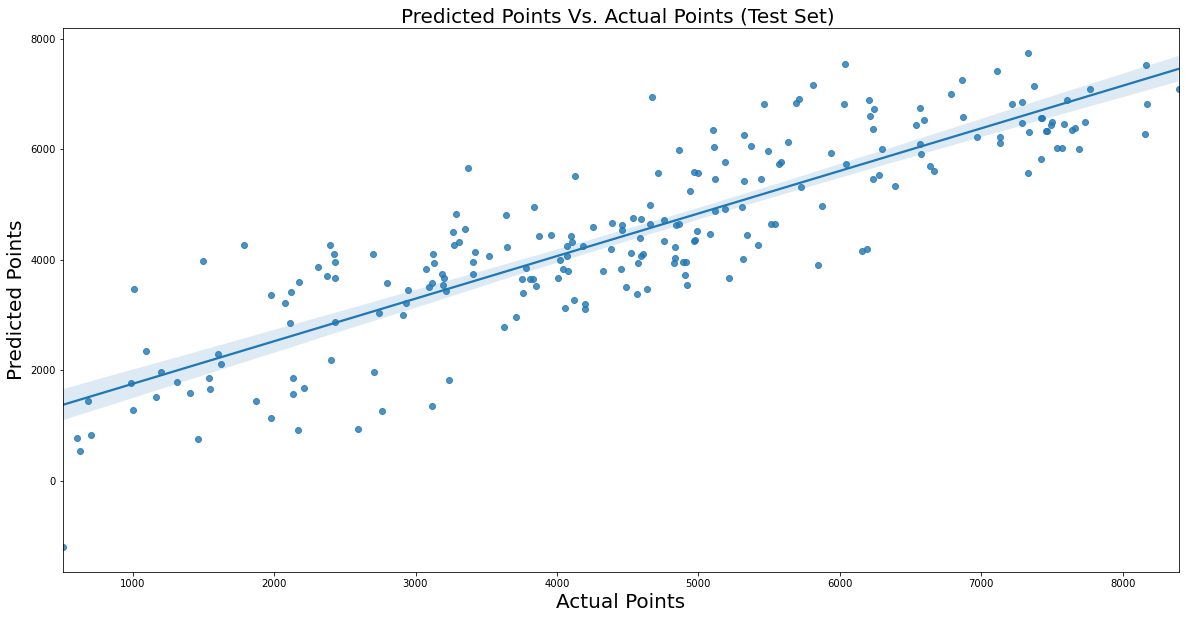

In [140]:
plt.figure(figsize=(20,10))
sns.regplot(x=y_test, y=y_test_pred)
plt.title('Predicted Points Vs. Actual Points (Test Set) ' , fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 20})
plt.ylabel('Predicted Points', fontdict={'fontsize': 20})
plt.show()

### Conclusions:-

#### Significant Factors:- 'yr', 'windspeed', 'spring', 'summer', 'winter', 'Light_Snow',' Mist', 'sep'
#### Rsquare value comes out to be 0.67